In [1]:
import pandas as pd
import numpy as np
from math import factorial, sqrt
from scipy import stats as st
from matplotlib import pyplot as plt

### Краткая характеристика данных

У нас имеются данные о сети самокатов GoFast (пользователи и их поездки) в нескольких городах.

Сервисом можно пользоваться:

1. Без подписки - абонентская плата отсутствует, стоимость одной минуты - 8 рублей, стоимость старта - 50 рублей.
2. С подпиский Ultra - абонентская  плата - 199 рублей в месяц, стоимость одной минуты - 6 рублей, стоимость старта - бесплатно.

Нам представлены 3 датафрейма:

1. Пользователи - user_go.csv:

    user_id - уникальный идентификатор пользователя
    
    name - имя пользователя
    
    age - возраст
    
    city - город
    
    subscription_type - тип подписки (free, ultra)

2. Поездки - rides_go.csv

   user_id - уникальный идентификатор пользователя

   distance - 	расстояние, которое пользователь проехал в текущей сессии (в метрах)

   duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал
   кнопку «Завершить поездку»

   date - дата совершения поездки

3. Подписки - subscriptions_go.csv

   subscription_type - тип подписки

   minute_price - стоимость одной минуты поездки по данной подписке

   start_ride_price - стоимость начала поездки

   subscription_fee - стоимость ежемесячного платежа

### Шаг 1. Загрузка данных

In [2]:
try: 
    users_go_df = pd.read_csv('users_go.csv')
except:
    users_go_df = pd.read_csv('/datasets/users_go.csv')

In [3]:
users_go_df.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
users_go_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
try: 
    rides_go_df = pd.read_csv('rides_go.csv')
except:
    rides_go_df = pd.read_csv('/datasets/rides_go.csv')

In [6]:
rides_go_df.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [7]:
rides_go_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
try: 
    subscriptions_go_df = pd.read_csv('subscriptions_go.csv')
except:
    subscriptions_go_df = pd.read_csv('/datasets/subscriptions_go.csv')

In [9]:
subscriptions_go_df.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
subscriptions_go_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


### Шаг 2. Предобработка данных

#### Приведем типы данных

In [11]:
rides_go_df['date'] = pd.to_datetime(rides_go_df['date'], format = '%Y-%m-%d')
rides_go_df.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


#### Создадим новый столбец с месяцем

In [12]:
rides_go_df['month'] = rides_go_df['date'].dt.month
rides_go_df.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


#### Проверим наличие пропусков

In [13]:
users_go_df.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [14]:
rides_go_df.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

subscriptions_go_df.isna().sum()

Пропущенных значений в датафреймах нет.

#### Удаление дубликатов

##### Дубликаты в user_go

In [15]:
users_go_df.duplicated().sum()

31

In [16]:
users_go_df = users_go_df.drop_duplicates()

In [17]:
users_go_df.duplicated().sum()

0

Проверим неявные дубликаты

In [18]:
temp_users_go_df = users_go_df.copy()
temp_users_go_df['name'] = users_go_df['name'].str.lower()
temp_users_go_df['city'] = users_go_df['city'].str.lower()
temp_users_go_df.duplicated().sum()

0

Неявных дубликатов нет.

##### Дубликаты в rides_go

In [19]:
rides_go_df.duplicated().sum()

0

Дубликаты отсутствуют и нет типов данных с возможными неявными дубликатами, поэтому оставим все, как есть.

##### Дубликаты в subscriptions_go

In [20]:
subscriptions_go_df.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Тут просто указаны подписки и дубликаты отсутсвуют.

### Шаг 3. Исследовательский анализ данных

#### Частота встречаемости городов

In [21]:
users_go_df.groupby('city')['user_id'].count().sort_values(ascending=False)

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: user_id, dtype: int64

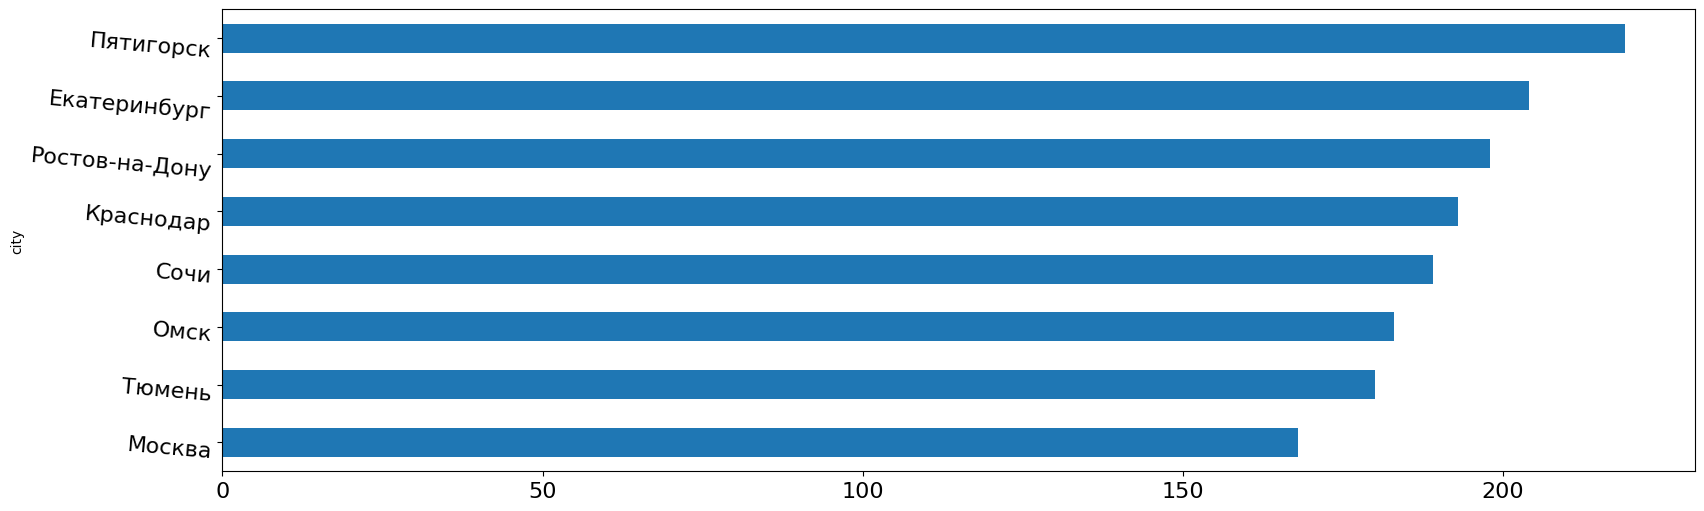

In [22]:
(
    users_go_df
    .groupby('city')['user_id']
    .count()
    .sort_values()
    .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
);

#### Соотношение пользователей с подпиской и без

In [23]:
users_go_df.groupby('subscription_type')['user_id'].count()

subscription_type
free     835
ultra    699
Name: user_id, dtype: int64

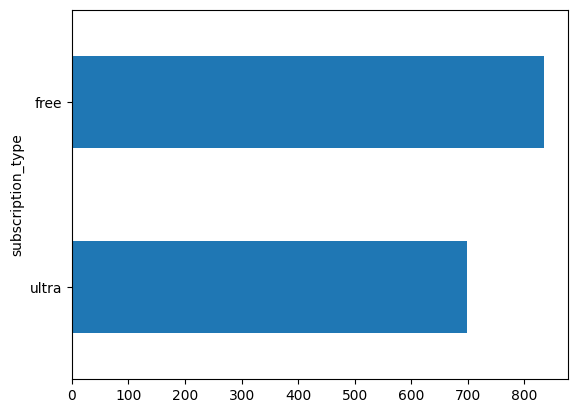

In [24]:
(
    users_go_df
    .groupby('subscription_type')['user_id']
    .count()
    .sort_values()
    .plot(kind='barh')
);

In [25]:
count_free = users_go_df.groupby('subscription_type')['user_id'].count()['free']
count_ultra = users_go_df.groupby('subscription_type')['user_id'].count()['ultra']
print(f'Процент людей с подпиской = {round(count_ultra / (count_free+count_ultra) * 100, 2)}%')
print(f'Процент людей без подписки = {round(count_free / (count_free+count_ultra) * 100, 2)}%')

Процент людей с подпиской = 45.57%
Процент людей без подписки = 54.43%


#### Возраст пользователей

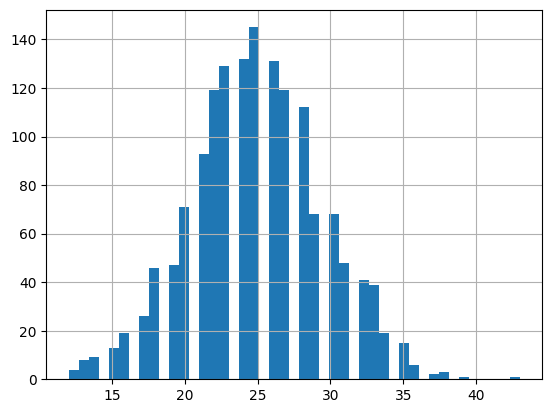

In [26]:
users_go_df['age'].hist(bins=45);

In [27]:
users_go_df['age'].mean()

24.903520208604956

Как мы можем увидеть, возраста распределены нормально вокруг среднего - 24.9.

#### Расстояние, преодоленное последователем за поездку

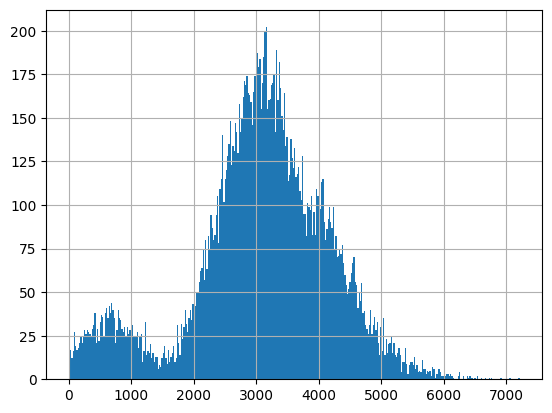

In [28]:
rides_go_df['distance'].hist(bins=350);

In [29]:
rides_go_df.query('distance<1500')['distance'].mean()

703.8897195239714

In [30]:
rides_go_df.query('1500<distance')['distance'].mean()

3331.889042794689

У нас распределения с двумя колоколами, у одного пик - 703.8, у другого - 3331.8.

#### Продолжительность поездок

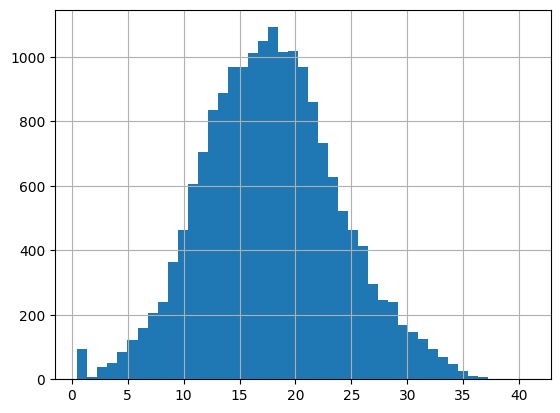

In [31]:
rides_go_df['duration'].hist(bins=45);

In [32]:
rides_go_df['duration'].mean()

17.80501119798444

Как мы можем увидеть, времена распределены нормально вокруг среднего - 17.8. За исключением выброса около нуля.

### Шаг 4. Объединение данных

#### Объединение данных о пользователях и поездках

In [33]:
user_rides_df = rides_go_df.merge(users_go_df, on='user_id')
user_rides_df = pd.merge(user_rides_df, subscriptions_go_df, how='left', on='subscription_type')

In [34]:
user_rides_df.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


#### Разделение датафрейма на пользователей с подпиской и без

In [35]:
user_free_rides_df = user_rides_df.query('subscription_type=="free"')
user_free_rides_df.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


In [36]:
user_ultra_rides_df = user_rides_df.query('subscription_type=="ultra"')
user_ultra_rides_df.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


#### Визуализация информации о пользователях с подпиской и без

##### Пользователи без подписки

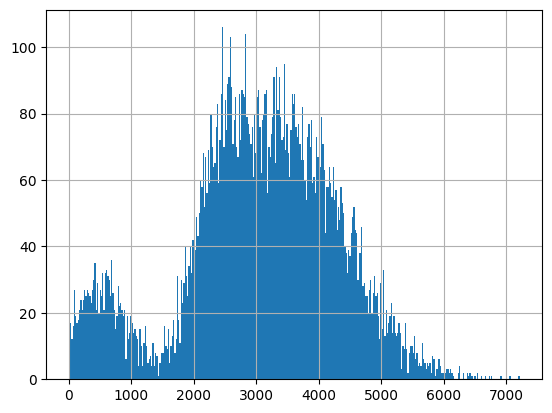

In [37]:
user_free_rides_df['distance'].hist(bins=350);

Гистограмма расстояния имеет похожий пик на то, что мы видели ранее, однако, у второго колокола нет ярковыраженного пика.

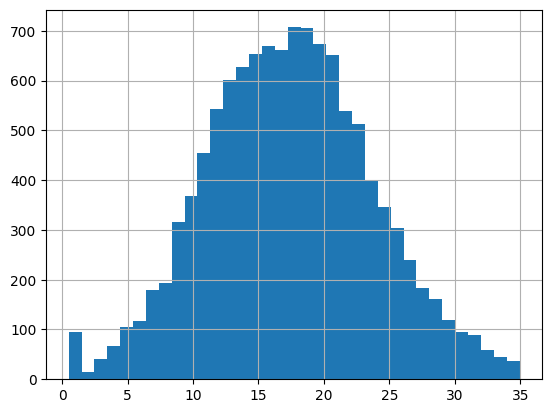

In [38]:
user_free_rides_df['duration'].hist(bins=35);

Гистограмма длительности близка к нормальному распределению, опять же с выбросом около 0.

##### Пользователи с подпиской

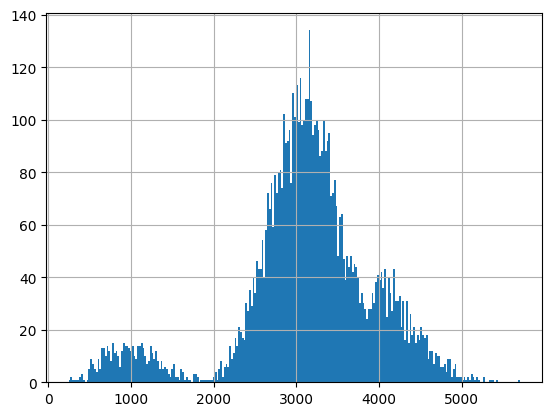

In [39]:
user_ultra_rides_df['distance'].hist(bins=250);

Колокола по сравнению с пользователями без подписки более узкие и каждый ближе к нормальному.

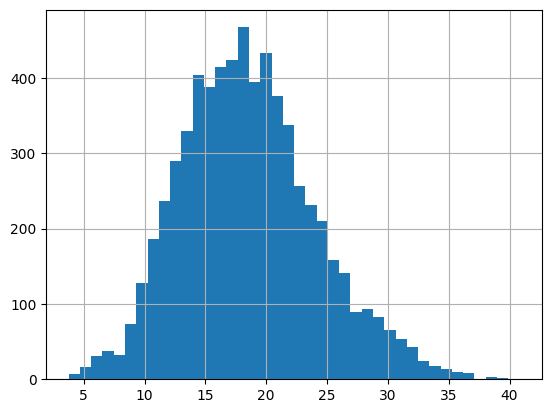

In [40]:
user_ultra_rides_df['duration'].hist(bins=40);

### Шаг 5. Подсчёт выручки

#### Агрегация данных

In [41]:
user_month_rides_df = user_rides_df.groupby(['user_id', 'month']) \
    .agg({'distance': 'sum', 'duration': 'sum', 'month': 'count'})
user_month_rides_df.columns= ['distance', 'duration', 'count']
user_month_rides_df = user_month_rides_df.reset_index()
user_month_rides_df = user_month_rides_df.merge(users_go_df, on='user_id')
user_month_rides_df = user_month_rides_df.merge(subscriptions_go_df, on='subscription_type')
user_month_rides_df.head(10)

,user_id,month,distance,duration,count,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.511294,41.416640,2,Кира,22,Тюмень,ultra,6,0,199
1,1,4,754.159807,6.232113,1,Кира,22,Тюмень,ultra,6,0,199
2,1,8,6723.470560,44.776802,2,Кира,22,Тюмень,ultra,6,0,199
3,1,10,5809.911100,31.578017,2,Кира,22,Тюмень,ultra,6,0,199
4,1,11,7003.499363,53.397424,3,Кира,22,Тюмень,ultra,6,0,199
5,1,12,6751.629942,27.203912,2,Кира,22,Тюмень,ultra,6,0,199
6,2,3,10187.723006,60.959959,3,Станислав,31,Омск,ultra,6,0,199
7,2,4,6164.381824,39.048633,2,Станислав,31,Омск,ultra,6,0,199
8,2,6,3255.338202,13.851127,1,Станислав,31,Омск,ultra,6,0,199
9,2,7,6780.722964,46.170157,2,Станислав,31,Омск,ultra,6,0,199


#### Подсчет выручки от каждого пользователя

##### Округлим значения

In [42]:
user_month_rides_df['distance'] = np.ceil(user_month_rides_df['distance'])
user_month_rides_df['duration'] = np.ceil(user_month_rides_df['duration'])

In [43]:
user_month_rides_df.head(10)

,user_id,month,distance,duration,count,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7028.0,42.0,2,Кира,22,Тюмень,ultra,6,0,199
1,1,4,755.0,7.0,1,Кира,22,Тюмень,ultra,6,0,199
2,1,8,6724.0,45.0,2,Кира,22,Тюмень,ultra,6,0,199
3,1,10,5810.0,32.0,2,Кира,22,Тюмень,ultra,6,0,199
4,1,11,7004.0,54.0,3,Кира,22,Тюмень,ultra,6,0,199
5,1,12,6752.0,28.0,2,Кира,22,Тюмень,ultra,6,0,199
6,2,3,10188.0,61.0,3,Станислав,31,Омск,ultra,6,0,199
7,2,4,6165.0,40.0,2,Станислав,31,Омск,ultra,6,0,199
8,2,6,3256.0,14.0,1,Станислав,31,Омск,ultra,6,0,199
9,2,7,6781.0,47.0,2,Станислав,31,Омск,ultra,6,0,199


##### Посчитаем помесячную выручку

In [44]:
user_month_rides_df.head(10)
user_month_rides_df.eval("revenue = start_ride_price + duration * minute_price + subscription_fee", 
       inplace=True)
user_month_rides_df.head(10)

,user_id,month,distance,duration,count,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,7028.0,42.0,2,Кира,22,Тюмень,ultra,6,0,199,451.0
1,1,4,755.0,7.0,1,Кира,22,Тюмень,ultra,6,0,199,241.0
2,1,8,6724.0,45.0,2,Кира,22,Тюмень,ultra,6,0,199,469.0
3,1,10,5810.0,32.0,2,Кира,22,Тюмень,ultra,6,0,199,391.0
4,1,11,7004.0,54.0,3,Кира,22,Тюмень,ultra,6,0,199,523.0
5,1,12,6752.0,28.0,2,Кира,22,Тюмень,ultra,6,0,199,367.0
6,2,3,10188.0,61.0,3,Станислав,31,Омск,ultra,6,0,199,565.0
7,2,4,6165.0,40.0,2,Станислав,31,Омск,ultra,6,0,199,439.0
8,2,6,3256.0,14.0,1,Станислав,31,Омск,ultra,6,0,199,283.0
9,2,7,6781.0,47.0,2,Станислав,31,Омск,ultra,6,0,199,481.0


### Шаг 6. Проверка гипотез

Задача: увеличить количество пользователей с подпиской.

#### Тратят ли пользователи с подпиской больше времени на поездки?

Чтобы понять правда ли это сформулируем следующие гипотезы:

Нулевая гипотеза: Пользователи без подписки и с подпиской тратят одинаковое количество времени на поездки

Альтернативная гипотеза: Пользователи с подиской тратят больше времени на поездки

Для проверки гипотез будем использовать два ранее созданных датафрема user_free_rides_df и user_ultra_rides_df. Поставим уровень статистической значимости, равным 0.05. 

In [45]:
print(f'Среднее выборки с пользователями без подписки: {np.mean(user_free_rides_df["duration"])}')
print(f'Среднее выборки с пользователями с подпиской: {np.mean(user_ultra_rides_df["duration"])}')

Среднее выборки с пользователями без подписки: 17.39090929866399
Среднее выборки с пользователями с подпиской: 18.54198516280583


In [46]:
alpha = 0.05

results = st.ttest_ind(
    user_ultra_rides_df["duration"],
     user_free_rides_df["duration"],
    equal_var=False,
    alternative='greater')

print(f'p-значение = {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

p-значение = 5.675781377128977e-37
Отвергаем нулевую гипотезу


Так как нулевая гипотеза была отвергнута, у нас есть основания говорить, что пользователи с подпиской действительно тратят больше времени на поездки.

#### Среднее расстояние, которое проезжают пользователи с подпиской, не превосходит 3130 метров.

Сформулируем гипотезы:

Нулевая гипотеза: Среднее расстояние за одну поездку пользователя с подпиской - 3130 метров.

Альтернативная гипотеза: Среднее расстояние больше, чем 3130 метров.

Взяли именно такую альтернативную гипотезу, потому что по условию у нас "не превышает 3130 метров", значит, нулевая гипотеза с такой альтернативной гипотезой полностью удовлетворяет условию.

In [47]:
value = 3130
alpha = 0.05

results = st.ttest_1samp(
    user_ultra_rides_df['distance'], value,
    alternative='greater')

print(f'p-значение = {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение = 0.9195368847849785
Не отвергаем нулевую гипотезу


Тест не отвергает то, что люди с подпиской в среднем проезжают меньше, чем 3130 метров.

#### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Будем действовать следующим образом: составим два датафрейма из 12 элементов каждый - среднюю выручку за каждый месяц от пользователей с подпиской и без. Затем проверим гипотезу о том, что среднее первого датафрейма больше.

Нулевая гипотеза: среднее датафрейма с пользователями с подпиской равно среднему пользователей без подписки.

Альтернативная гипотеза: среднее с пользователями с подписками выше, чем у пользователей без подписки.

Созаздим нужные датафреймы со средней выручкой за каждый месяц.

In [48]:
user_month_rides_free_df = user_month_rides_df.query('subscription_type=="free"')
user_month_rides_free_df = user_month_rides_free_df.pivot_table(index='month', values='revenue', aggfunc='mean')
user_month_rides_free_df

,revenue
month,
1,287.186667
2,278.930057
3,295.482014
4,296.264014
5,291.158813
6,289.538200
7,291.651246
8,291.600000
9,296.100520


In [49]:
user_month_rides_ultra_df = user_month_rides_df.query('subscription_type=="ultra"')
user_month_rides_ultra_df = user_month_rides_ultra_df.pivot_table(index='month', values='revenue', aggfunc='mean')
user_month_rides_ultra_df

,revenue
month,
1,367.953846
2,351.033898
3,358.772727
4,365.844920
5,367.029630
6,360.155779
7,366.400000
8,359.625000
9,362.994366


Глядя на датафреймы, уже видно, что средняя выручка от пользователей без подписки явно выше. Нет смысла проверять гипотезу и проводить тест, он покажет, что доходность выше в любом случае.

#### Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Нужно проверить снизилось ли количество обращений?

Мы бы пользовались двухвыборочным t-тестом для зависимых выборок.

### Шаг 7. Распределения

#### Увеличение количества подписчиков

Задача: увеличить количество пользователей с платной подпиской на 100 существующих клиентов, у которых еще нет платной подписки.  

Данные: после раздачи промокодов платную подписку продлевают 10% пользователей, нужно раздать столько промокодов, чтобы вероятность не выполнить план была примерно 5%.

В данном случае мы работаем с биномиальным распределением с вероятностью успеха 0.1. Попробуем подобрать n, чтобы вероятность успеха для 100 клиентов была 5 или меньше процентов.

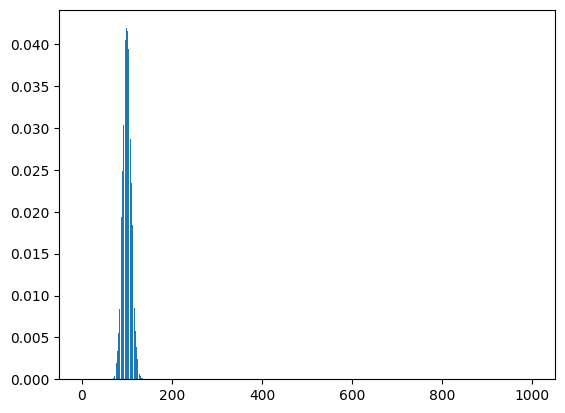

In [50]:
p = 0.1
n = 1000

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1-p)**(n-k) 
    distr.append(prob)

plt.bar(range(0, n + 1), distr);

Как мы можем увидеть, если n=1000, то мат. ожидание как раз 100 (=n * p). Однако, все еще с вероятностью 50% значение будет меньше нужного, поэтому увеличим n. Однако при увеличении n программа отказывается считать настолько большие числа, поэтому попробуем взять n=1200 и апроксимировать его к нормальному распределению, затем проверим результат.

In [51]:
p = 0.1
n = 1200

print(f'Мат. ожидание: {p * n}')
print(f'Стандартное отклонение: {sqrt(n*p*(1-p))}')
print(f'Мат. ожидание плюс минус три стандартных отклонения: ({p*n - 3 * sqrt(n*p*(1-p))}, {p*n + 3 * sqrt(n*p*(1-p))})')
print(f'Промежуток [0, n]: [0, {n}]')

Мат. ожидание: 120.0
Стандартное отклонение: 10.392304845413264
Мат. ожидание плюс минус три стандартных отклонения: (88.82308546376021, 151.1769145362398)
Промежуток [0, n]: [0, 1200]


Имеем право апроксимировать. Построим график этого распределения.

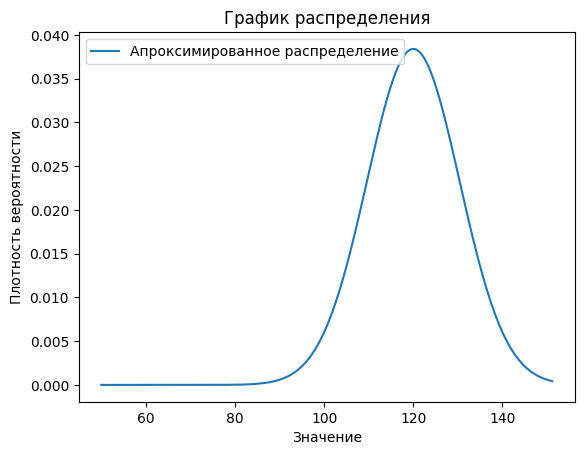

In [52]:
mean = n * p
std_dev = sqrt(n * p * (1 - p))

x = np.linspace(50, mean + 3 * std_dev, 1000)
y = st.norm.pdf(x, mean, std_dev)

plt.plot(x, y, label='Апроксимированное распределение')
plt.title('График распределения')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

Как мы можем увидеть для n=1200 значение 100 находится примерно на 5%, проверим это с помощью CDF.

In [53]:
distr = st.norm(mean, std_dev)

result = distr.cdf(100)
print(result)

0.027145914183427298


1200 даже много, попробуем запустить цикл и вывести самое близкое значение cdf(100) к 5 процентам.

In [54]:
p = 0.1
nearest = 1000
for n in range(1200, 1000, -1):
    mean = n * p
    std_dev = sqrt(n * p * (1 - p))
    distr = st.norm(mean, std_dev)
    result = distr.cdf(100)
    nearest = n
    if result <= 0.05:
        continue
    else:
        break

print(f'Самое подходящее n = {nearest}, cdf(100) = {result}')

Самое подходящее n = 1168, cdf(100) = 0.050650790692463


In [55]:
n = 1168
p=0.1
print(f'Мат. ожидание: {p * n}')
print(f'Стандартное отклонение: {sqrt(n*p*(1-p))}')
print(f'Мат. ожидание плюс минус три стандартных отклонения: ({p*n - 3 * sqrt(n*p*(1-p))}, {p*n + 3 * sqrt(n*p*(1-p))})')
print(f'Промежуток [0, n]: [0, {n}]')

Мат. ожидание: 116.80000000000001
Стандартное отклонение: 10.252804494381039
Мат. ожидание плюс минус три стандартных отклонения: (86.0415865168569, 147.5584134831431)
Промежуток [0, n]: [0, 1168]


Мы имеем право апроксимировать это распределение к нормальному, значит, проверка достоверна. Мы выяснили, что при n=1168, вероятность получить менее 100 новых подписчиков ~0.05 (0.050650790692463).

In [56]:
p = 0.1
n = 1168
mean = p*n
std_dev = sqrt(n*p*(1-p))
distr = st.norm(mean, std_dev)
result = distr.cdf(100)
print(result)

0.050650790692463


#### Рассылка push-уведомлений

Опять имеем дело с биномальным распределением, но в этот раз о нем все известно: n= 1000000, p=0.4. Проверим имеем ли мы право свести его к нормальному.

In [57]:
n = 1_000_000
p = 0.4

print(f'Мат. ожидание: {p * n}')
print(f'Стандартное отклонение: {sqrt(n*p*(1-p))}')
print(f'Мат. ожидание плюс минус три стандартных отклонения: ({p*n - 3 * sqrt(n*p*(1-p))}, {p*n + 3 * sqrt(n*p*(1-p))})')
print(f'Промежуток [0, n]: [0, {n}]')

Мат. ожидание: 400000.0
Стандартное отклонение: 489.89794855663564
Мат. ожидание плюс минус три стандартных отклонения: (398530.3061543301, 401469.6938456699)
Промежуток [0, n]: [0, 1000000]


Имеем право апроксимировать к нормальному распределению. Найдем вероятность получить не больше, чем это число.

In [58]:
mean = p*n
std_dev = sqrt(n*p*(1-p))
distr = st.norm(mean, std_dev)
result = distr.cdf(399_500)
print(result)

0.15371708296369768


Мы получили 15%, значит, 399500 является пределом 1 сигмы. Можем проверить.

In [59]:
print(f'Мат. ожидание плюс минус стандартное отклонения: ({p*n - sqrt(n*p*(1-p))}, {p*n + sqrt(n*p*(1-p))})')

Мат. ожидание плюс минус стандартное отклонения: (399510.10205144336, 400489.89794855664)


Как и ожидалось.